<a href="https://colab.research.google.com/github/FGalvao77/Desenvolvendo-tecnicas-de-Web-Scraping-com-Python/blob/main/Desenvolvendo_t%C3%A9cnicas_de_Web_Scraping_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Desenvolvendo técnicas de `Web Scraping` com _Python_**
---
---

### **O que é `Web Scraping`?**

O **Web scraping** (ou _raspagem de dados_) é uma técnica de extração automática de dados de sites e páginas da Web publicamente acessíveis. Essas informações, por sua vez, podem ser baixadas ou armazenadas e usadas ​​para qualquer finalidade.

In [1]:
# importando as bibliotecas/funções necessárias
import pandas as pd                 
import numpy as np                  
import requests
import matplotlib.pyplot as plt
import warnings

from bs4 import BeautifulSoup
from wordcloud import WordCloud

warnings.filterwarnings('ignore')

In [2]:
# utilizando o google para buscar notícias das americanas e salvando o resultado no objeto "url"
url = 'https://www.google.com/search?q=americanas&client=ubuntu&biw=1294&bih=631&tbm=nws&sxsrf=AJOqlzUxtGdgYBrEs8BBZlxdZ0WtMt3kMQ%3A1676304102141&ei=5l7qY9GfCKCz5OUPsfaW6AU&oq=amer&gs_lcp=Cgxnd3Mtd2l6LW5ld3MQARgAMgcIABCxAxBDMgsIABCABBCxAxCDATIICAAQgAQQsQMyCggAELEDEIMBEEMyCAgAEIAEELEDMgoIABCxAxCDARBDMgsIABCABBCxAxCDATIICAAQgAQQsQMyCwgAEIAEELEDEIMBMggIABCABBCxAzoICAAQsQMQgwFQ3gdY3hRggiRoAXAAeACAAbgBiAHqA5IBAzEuM5gBAKABAbABAMABAQ&sclient=gws-wiz-news'

In [3]:
# com "requests.get()" passando como argumento o objeto "url" instanciado acima
# para realizar a raspagem das notícias referente a americanas
website_pages = requests.get(url=url)

# visualizando o resultado da requisição
website_pages

<Response [200]>

In [4]:
# utilizando o "BeautifulSoup" para realizar o "parser" dos dados, ou seja,
# transformar o objeto "website_pages" em elementos "html"
data_collection = BeautifulSoup(website_pages.text, 'html.parser')

<!DOCTYPE doctype html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>americanas - Google Search</title><script nonce="eYXA_qTsPof7XFt0r1WHSg">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.g
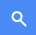
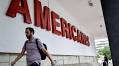
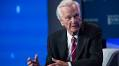
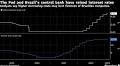
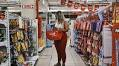
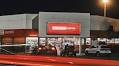

In [5]:
# visualizando o conteúdo do objeto
data_collection

In [6]:
# visualizando o tipo do objeto
type(data_collection)

bs4.BeautifulSoup

In [7]:
# vsualizando a tag "title" 
data_collection.title   # título

<title>americanas - Google Search</title>

In [8]:
# transformando a tag "title" em um objeto do tipo "string"
data_collection.title.string

'americanas - Google Search'

In [9]:
# visualizando o nome da tag "title"
data_collection.title.name

'title'

In [10]:
# contabilizando a tag "a"
## o elemento <a> em HTML (ou elemento âncora), com o atributo href cria-se um 
## hiperligação nas páginas web, arquivos, endereços de emails, ligações na mesma ...
len(data_collection.find_all('a'))

32

In [11]:
# contabilizando a tag "div"
## elemento de divisão **HTML <div> **é um container genérico para conteúdo de fluxo
len(data_collection.find_all('div'))

191

In [12]:
# contabilizando a tag "img"
## o elemento **HTML <img> **(or HTML Image Element) representa a inserção de imagem no documento
len(data_collection.find_all('img'))

9

In [13]:
# contabilizando a tag "span"
## o elemento HTML <span> é um conteiner generico em linha para conteúdo 
## fraseado , que não representa nada por natureza
len(data_collection.find_all('span'))

23

> Quer conhecer mais sobre elementos, clique em [Elementos HTML](https://developer.mozilla.org/pt-BR/docs/Web/HTML/Element).

In [14]:
# função para realizar a raspagem de dados de um conteúdo de interesse
def looking_for(ticket:str) -> str:
    '''
    Função para realizar a raspagem de dados de um conteúdo de interesse,
    passando como argumento uma palavra (cadeia de caracteres)
    Utilizando o google como buscador
    '''

    url = f'https://www.google.com/search?q={ticket}&hl=pt-BR&biw=1294&bih=631&tbm=nws&sxsrf=AJOqlzUuuqcFT5N0fILgZpv-ecGTh8fmLw%3A1676381432694&ei=-IzrY4OEKqbS1sQP9b6XmAE&oq=bols&gs_lcp=Cgxnd3Mtd2l6LW5ld3MQARgAMgcIABCxAxBDMgoIABCxAxCDARBDMgcIABCxAxBDMgcIABCxAxBDMggIABCABBCxAzIKCAAQsQMQgwEQQzIICAAQgAQQsQMyCwgAEIAEELEDEIMBMggIABCABBCxAzILCAAQgAQQsQMQgwE6CAgAELEDEIMBUOIMWNsUYP4iaAFwAHgAgAFpiAGQA5IBAzIuMpgBAKABAbABAMABAQ&sclient=gws-wiz-news'
    
    resp = requests.get(url)
    cod_HTML = resp.text
    obj_SOUP = BeautifulSoup(cod_HTML, 'html.parser')

    
    return obj_SOUP

<!DOCTYPE doctype html>
<html lang="pt-BR"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>americanas - Pesquisa Google</title><script nonce="mX7waEKOP3C3mzpLoYp31w">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=win
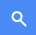
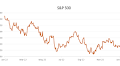
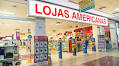
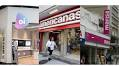
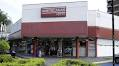

In [15]:
# utilizando a função para realizar a raspagem de dados
looking_for('americanas')

In [16]:
# com a função "looking_for()" e passando como argumento "americanas"
## realizando a raspagem e salvando o resultado no objeto "data"
data = looking_for('americanas')

In [17]:
# contabilizando o objeto
len(data)

2

In [18]:
# visualizando o conteúdo do elemento "h3"
## os elementos HTML <h> – representam seis níveis de título de seção, são eles:
## h1, h2, h3, h4, h5, e h6 - é o nível de seção mais alto e é o mais baixo.
data.find_all('h3')

[<h3 class="zBAuLc l97dzf"><div class="BNeawe vvjwJb AP7Wnd">Caso Americanas impacta seguro de crédito no Brasil</div></h3>,
 <h3 class="zBAuLc l97dzf"><div class="BNeawe vvjwJb AP7Wnd">Evento das Lojas Americanas abala o mercado de crédito brasileiro</div></h3>,
 <h3 class="zBAuLc l97dzf"><div class="BNeawe vvjwJb AP7Wnd">União vai arcar com 40% da dívida bilionária das Americanas com ...</div></h3>,
 <h3 class="zBAuLc l97dzf"><div class="BNeawe vvjwJb AP7Wnd">Americanas pedem liberação de R$ 192 mi para pagar ...</div></h3>,
 <h3 class="zBAuLc l97dzf"><div class="BNeawe vvjwJb AP7Wnd">Para quem a corda vai arrebentar no caso Americanas</div></h3>,
 <h3 class="zBAuLc l97dzf"><div class="BNeawe vvjwJb AP7Wnd">Bradesco: Americanas querem 'criar mesquinha cortina de fumaça' com emails</div></h3>,
 <h3 class="zBAuLc l97dzf"><div class="BNeawe vvjwJb AP7Wnd">Americanas (AMER3) sofre com fuga de clientes após crise</div></h3>,
 <h3 class="zBAuLc l97dzf"><div class="BNeawe vvjwJb AP7Wnd">A l

In [19]:
# salvando os títulos das notícias no objeto "elements"
elements = data.find_all('h3')

In [20]:
# contabilizando a quantidade de títulos
len(elements)

10

In [21]:
# visualizando os títulos das notícias
news = [text_.get_text() for text_ in elements]

print(f'\tNEWS | total: {len(news)}')
print('=='*50, end='\n\n')
news

	NEWS | total: 10



['Caso Americanas impacta seguro de crédito no Brasil',
 'Evento das Lojas Americanas abala o mercado de crédito brasileiro',
 'União vai arcar com 40% da dívida bilionária das Americanas com ...',
 'Americanas pedem liberação de R$ 192 mi para pagar ...',
 'Para quem a corda vai arrebentar no caso Americanas',
 "Bradesco: Americanas querem 'criar mesquinha cortina de fumaça' com emails",
 'Americanas (AMER3) sofre com fuga de clientes após crise',
 'A liminar do caso Americanas e a segurança jurídica do direito da insolvência',
 'Americanas, Oi, Marisa, Tok&Stok: por que tantas empresas estão em crise?',
 'O novo CEO da Americanas']

In [22]:
# realizando a numeração das dos títulos das notícias
for k, v in enumerate(news[0:]):
    print(k, v)

0 Caso Americanas impacta seguro de crédito no Brasil
1 Evento das Lojas Americanas abala o mercado de crédito brasileiro
2 União vai arcar com 40% da dívida bilionária das Americanas com ...
3 Americanas pedem liberação de R$ 192 mi para pagar ...
4 Para quem a corda vai arrebentar no caso Americanas
5 Bradesco: Americanas querem 'criar mesquinha cortina de fumaça' com emails
6 Americanas (AMER3) sofre com fuga de clientes após crise
7 A liminar do caso Americanas e a segurança jurídica do direito da insolvência
8 Americanas, Oi, Marisa, Tok&Stok: por que tantas empresas estão em crise?
9 O novo CEO da Americanas


In [23]:
# visualizando o título da primeira notícia
news[0]

'Caso Americanas impacta seguro de crédito no Brasil'

In [24]:
# realizando o ".split()" do texto da primeira notícia
news[0].split()

['Caso', 'Americanas', 'impacta', 'seguro', 'de', 'crédito', 'no', 'Brasil']

In [25]:
# criando um data frame com o objeto "news" 
df = pd.DataFrame(news, columns=['news title'])

# visualizando o data frame criado
df

,news title
0,Caso Americanas impacta seguro de crédito no B...
1,Evento das Lojas Americanas abala o mercado de...
2,União vai arcar com 40% da dívida bilionária d...
3,Americanas pedem liberação de R$ 192 mi para p...
4,Para quem a corda vai arrebentar no caso Ameri...
5,Bradesco: Americanas querem 'criar mesquinha c...
6,Americanas (AMER3) sofre com fuga de clientes ...
7,A liminar do caso Americanas e a segurança jur...
8,"Americanas, Oi, Marisa, Tok&Stok: por que tant..."
9,O novo CEO da Americanas


In [26]:
# concatenando as notícias em somente um elemento para a seguir realizar a plotagem da nuvem de palavras
concatenate_words = ''

for i in news:
    broken_text = i.split()

    for word in broken_text:
        concatenate_words = concatenate_words + ' ' + word

In [27]:
# visualizando o conteúdo do objeto
concatenate_words

" Caso Americanas impacta seguro de crédito no Brasil Evento das Lojas Americanas abala o mercado de crédito brasileiro União vai arcar com 40% da dívida bilionária das Americanas com ... Americanas pedem liberação de R$ 192 mi para pagar ... Para quem a corda vai arrebentar no caso Americanas Bradesco: Americanas querem 'criar mesquinha cortina de fumaça' com emails Americanas (AMER3) sofre com fuga de clientes após crise A liminar do caso Americanas e a segurança jurídica do direito da insolvência Americanas, Oi, Marisa, Tok&Stok: por que tantas empresas estão em crise? O novo CEO da Americanas"

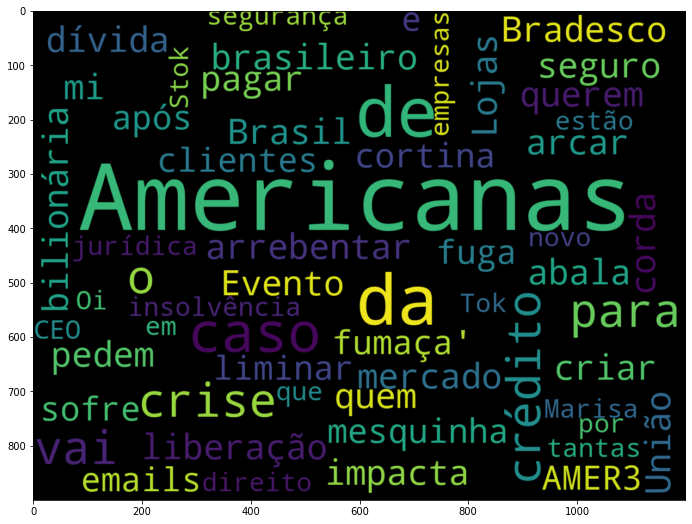

In [28]:
# plotando a nuvem de palavras
word_cloud = WordCloud(
    width=1_200,
    height=900
).generate(concatenate_words)

fig, ax = plt.subplots(figsize=(12, 9))

ax.imshow(word_cloud, 
    interpolation='bilinear')

plt.show()

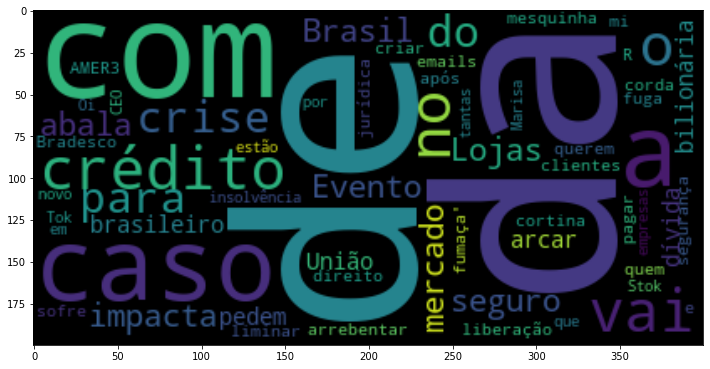

In [29]:
# aplicando "stopwords" - excluindo a palavra "Americanas"
word_cloud = WordCloud(
    # width=1_200,
    # height=1_000,
    stopwords=['americanas']
).generate(concatenate_words)


fig, ax = plt.subplots(figsize=(12, 9))

ax.imshow(word_cloud, 
    interpolation='bilinear')

plt.show()

In [30]:
# importando as funções "WordCloud", "STOPWORDS" e "ImageColorGenerator"
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [31]:
# instanciando o objeto "STOPWORDS" em um conjunto
stopwords = set(STOPWORDS)

# contabilizando a quantidade de palavras "STOPWORDS"
len(stopwords)

192

In [32]:
# visualizando as 20 primeiras palavras do objeto
list(stopwords)[:20]

['after',
 'and',
 "isn't",
 'same',
 'i',
 'through',
 "when's",
 'hers',
 'her',
 'any',
 'if',
 'have',
 'other',
 'as',
 'both',
 'your',
 'could',
 "don't",
 'hence',
 'do']

In [33]:
# visualizando as 20 últimas palavras do objeto
list(stopwords)[20:]

['myself',
 'again',
 'just',
 'about',
 'himself',
 'between',
 'having',
 'over',
 "you're",
 "wouldn't",
 'had',
 "she'd",
 "let's",
 "he'll",
 'there',
 'at',
 'once',
 'herself',
 'like',
 'me',
 "you've",
 'ever',
 'while',
 "shouldn't",
 "why's",
 "it's",
 'below',
 'that',
 'also',
 'into',
 'was',
 'therefore',
 'ours',
 'when',
 'in',
 "what's",
 "wasn't",
 'has',
 'being',
 'so',
 'them',
 'very',
 'here',
 "doesn't",
 'our',
 'by',
 'else',
 'but',
 "we'll",
 'each',
 "we're",
 "aren't",
 "they'll",
 'am',
 'she',
 'off',
 'down',
 'would',
 'shall',
 "they'd",
 'own',
 "how's",
 'which',
 'he',
 'all',
 'did',
 "shan't",
 'his',
 "mustn't",
 "didn't",
 'further',
 "he'd",
 'or',
 'themselves',
 'no',
 'get',
 "i've",
 'up',
 'ought',
 'before',
 'the',
 'you',
 'yourself',
 'a',
 'under',
 "can't",
 'above',
 'what',
 'not',
 "they're",
 'such',
 "weren't",
 "you'd",
 'http',
 'are',
 'some',
 "haven't",
 'of',
 'it',
 "couldn't",
 'should',
 'this',
 'those',
 'against',


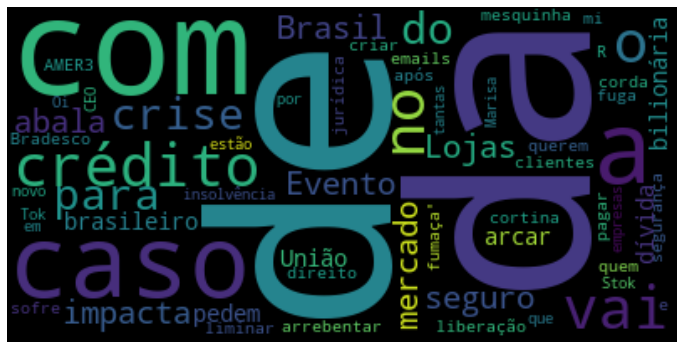

In [34]:
# plotando nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords, 
                      width=1_200,
                      height=900,
                      background_color='black').generate(concatenate_words)

plt.figure(figsize=(12, 9))

plt.imshow(X=word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Utilizando a biblioteca [NLTK](https://www.nltk.org/howto/portuguese_en.html) para realizar aplicação do `stopwords` em português

In [35]:
# importando a biblioteca "nltk"
import nltk

# realizando download do pacote "stopwords"
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
# instanciando o objeto e realizando a seleção de stopwords em português
stopwords = nltk.corpus.stopwords.words('portuguese')

In [37]:
# contabilizando a quantidade de elementos no objeto "stopwords"
len(stopwords)

207

In [38]:
# visualizando as 20 primeiras palavras do objeto
stopwords[:20]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele']

In [39]:
# visualizando as 20 últimas palavras do objeto
stopwords[20:]

['deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'houveremos',
 'houveria',
 'houveriam',
 'houveríamos',
 'houvermos',
 'houvesse',
 'houvessem',
 'houvéssemos',
 'isso',
 'isto',
 'já',
 'lhe',
 'lhes',
 'mais',
 'mas',
 'me

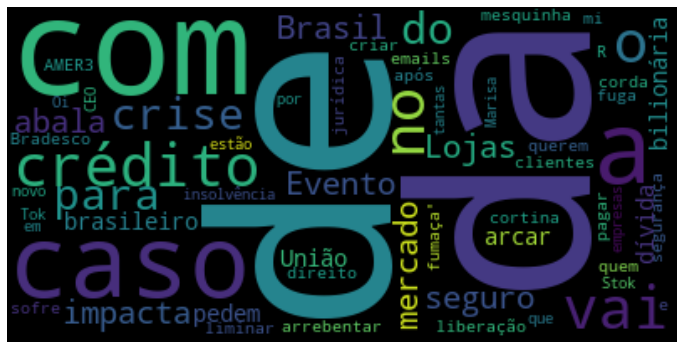

In [40]:
# plotando nuvem de palavras
wordcloud = WordCloud(stopwords=stopwords, 
                      width=1_200,
                      height=900,
                      background_color='black').generate(concatenate_words)

plt.figure(figsize=(12, 9))
plt.imshow(X=word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
# realizando o download do logo da empresa
!curl https://itaupowershopping.com.br/cont/uploads/2022/11/lojas-itaupower-shopping-157-1-1-1-1.png >> logo-americanas.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11423  100 11423    0     0   2154      0  0:00:05  0:00:05 --:--:--  2379


In [42]:
# importando a função "Image" da biblioteca "PIL"
from PIL import Image

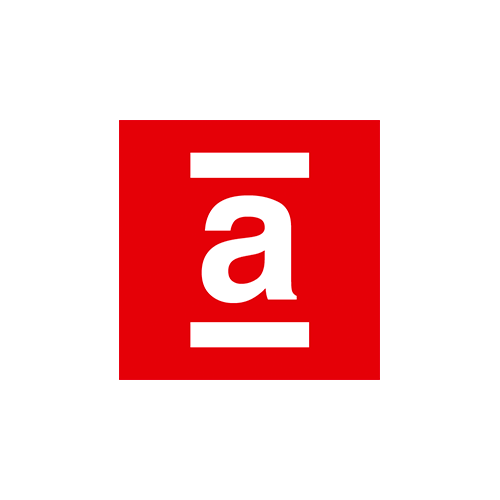

In [43]:
# realizando a visualização da imagem
Image.open('logo-americanas.png')

In [44]:
# visualizando a imagem em um objeto do tipo vetor - numpy-array
np.array(Image.open('logo-americanas.png'))

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [45]:
# criando uma "máscara" com o numpy-array do objeto
mask = np.array(Image.open('logo-americanas.png'))

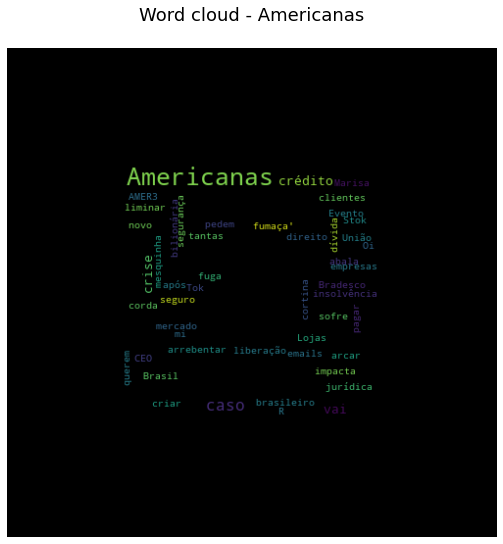

In [46]:
# visualizando nuvem de palavras
word_cloud = WordCloud(
    stopwords=stopwords,
    mask=mask,
    width=1_200,
    height=900
).generate(concatenate_words)


fig, ax = plt.subplots(figsize=(12, 9))

ax.imshow(word_cloud, 
    interpolation='bilinear')

plt.title('Word cloud - Americanas\n', size=18)
plt.axis('off')
plt.savefig('wordCloud_americanas.png')
plt.show()

In [47]:
# visualizando as variáveis local do ambiente
%whos

Variable              Type             Data/Info
------------------------------------------------
BeautifulSoup         type             <class 'bs4.BeautifulSoup'>
Image                 module           <module 'PIL.Image' from <...>t-packages/PIL/Image.py'>
ImageColorGenerator   type             <class 'wordcloud.color_f<...>age.ImageColorGenerator'>
STOPWORDS             set              {'after', 'and', "isn't",<...>heirs', 'does', "hasn't"}
WordCloud             type             <class 'wordcloud.wordcloud.WordCloud'>
ax                    AxesSubplot      AxesSubplot(0.229375,0.125;0.56625x0.755)
broken_text           list             n=5
concatenate_words     str               Caso Americanas impacta <...> O novo CEO da Americanas
data                  BeautifulSoup    <!DOCTYPE doctype html>\n<...>);</script></body></html>
data_collection       BeautifulSoup    <!DOCTYPE doctype html>\n<...>);</script></body></html>
df                    DataFrame                               

In [48]:
# visualizando as variáveis local do ambiente em formato de uma lista
%who_ls

['BeautifulSoup',
 'Image',
 'ImageColorGenerator',
 'STOPWORDS',
 'WordCloud',
 'ax',
 'broken_text',
 'concatenate_words',
 'data',
 'data_collection',
 'df',
 'elements',
 'fig',
 'i',
 'k',
 'looking_for',
 'mask',
 'news',
 'nltk',
 'np',
 'pd',
 'plt',
 'requests',
 'stopwords',
 'url',
 'v',
 'warnings',
 'website_pages',
 'word',
 'word_cloud',
 'wordcloud']